In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1)
train, test = train_test_split(data, test_size=0.30)
data.describe()

,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Escolaridade_Pai,...,DVD,TV_Assinatura,Celular,Telefone_Fixo,Computador,Internet,Renda_per_capta,Pessoas_por_quarto,Pessoas_por_computador,Celulares_por_pessoa
count,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,...,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06
mean,1.952823e-03,-1.379273e-04,7.711374e-04,-2.337789e-03,8.082849e-05,-2.425244e-02,-9.367279e-04,1.038642e-03,3.386821e-06,-1.779899e-02,...,-1.744989e-04,-6.345382e-03,1.948550e-03,-5.575564e-03,-2.200296e-02,1.105298e-02,8.362171e+02,1.871392e+00,1.820383e+00,6.735228e-01
std,3.811280e-01,1.659481e-01,1.479893e-01,3.946580e-01,4.039205e-02,4.916430e-01,4.703076e-01,2.667147e-01,5.908589e-02,6.772674e-01,...,1.346696e-01,3.821388e-01,4.800134e-01,3.821529e-01,7.550060e-01,4.676404e-01,1.254462e+03,9.950263e-01,1.986697e+00,3.109964e-01
min,-4.146910e-01,-1.988856e-01,-5.038986e-02,-5.230838e-01,-1.584228e-02,-1.824682e+00,-4.971218e-01,-4.055080e-01,-8.809104e-02,-1.707128e+00,...,-2.045853e-01,-7.386883e-01,-6.563548e-01,-6.854706e-01,-2.423190e+00,-2.390580e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-3.420107e-01,-1.988856e-01,-5.038986e-02,-5.230838e-01,-1.584228e-02,9.853229e-03,-4.971218e-01,-1.623837e-01,-4.679373e-02,-3.922961e-01,...,-2.045853e-01,1.930558e-01,-3.091540e-01,2.092235e-01,-3.755024e-01,-2.390580e-01,2.994000e+02,1.333333e+00,0.000000e+00,5.000000e-01
50%,-1.470738e-02,1.384236e-01,-5.038986e-02,2.793551e-01,6.392830e-03,9.853229e-03,4.448430e-01,-1.845375e-02,2.340675e-02,2.036856e-01,...,8.854827e-02,1.930558e-01,1.482051e-01,2.092235e-01,-3.755024e-01,-2.390580e-01,4.990000e+02,1.666667e+00,1.333333e+00,6.666667e-01
75%,3.108230e-01,1.384236e-01,-5.038986e-02,2.793551e-01,6.392830e-03,2.792401e-01,4.448430e-01,1.669237e-01,2.340675e-02,5.818676e-01,...,8.854827e-02,1.930558e-01,1.482051e-01,2.092235e-01,6.913153e-01,-2.390580e-01,8.316667e+02,2.000000e+00,3.000000e+00,1.000000e+00
max,7.673745e-01,1.384236e-01,1.159082e+00,9.992840e-01,6.757275e-01,2.792401e-01,4.448430e-01,1.945867e+00,1.309356e-01,1.107397e+00,...,8.854827e-02,1.930558e-01,7.213333e-01,2.092235e-01,6.913153e-01,8.854146e-01,3.000000e+04,2.000000e+01,2.000000e+01,4.000000e+00


## Feature importance

### Correlation Matrix

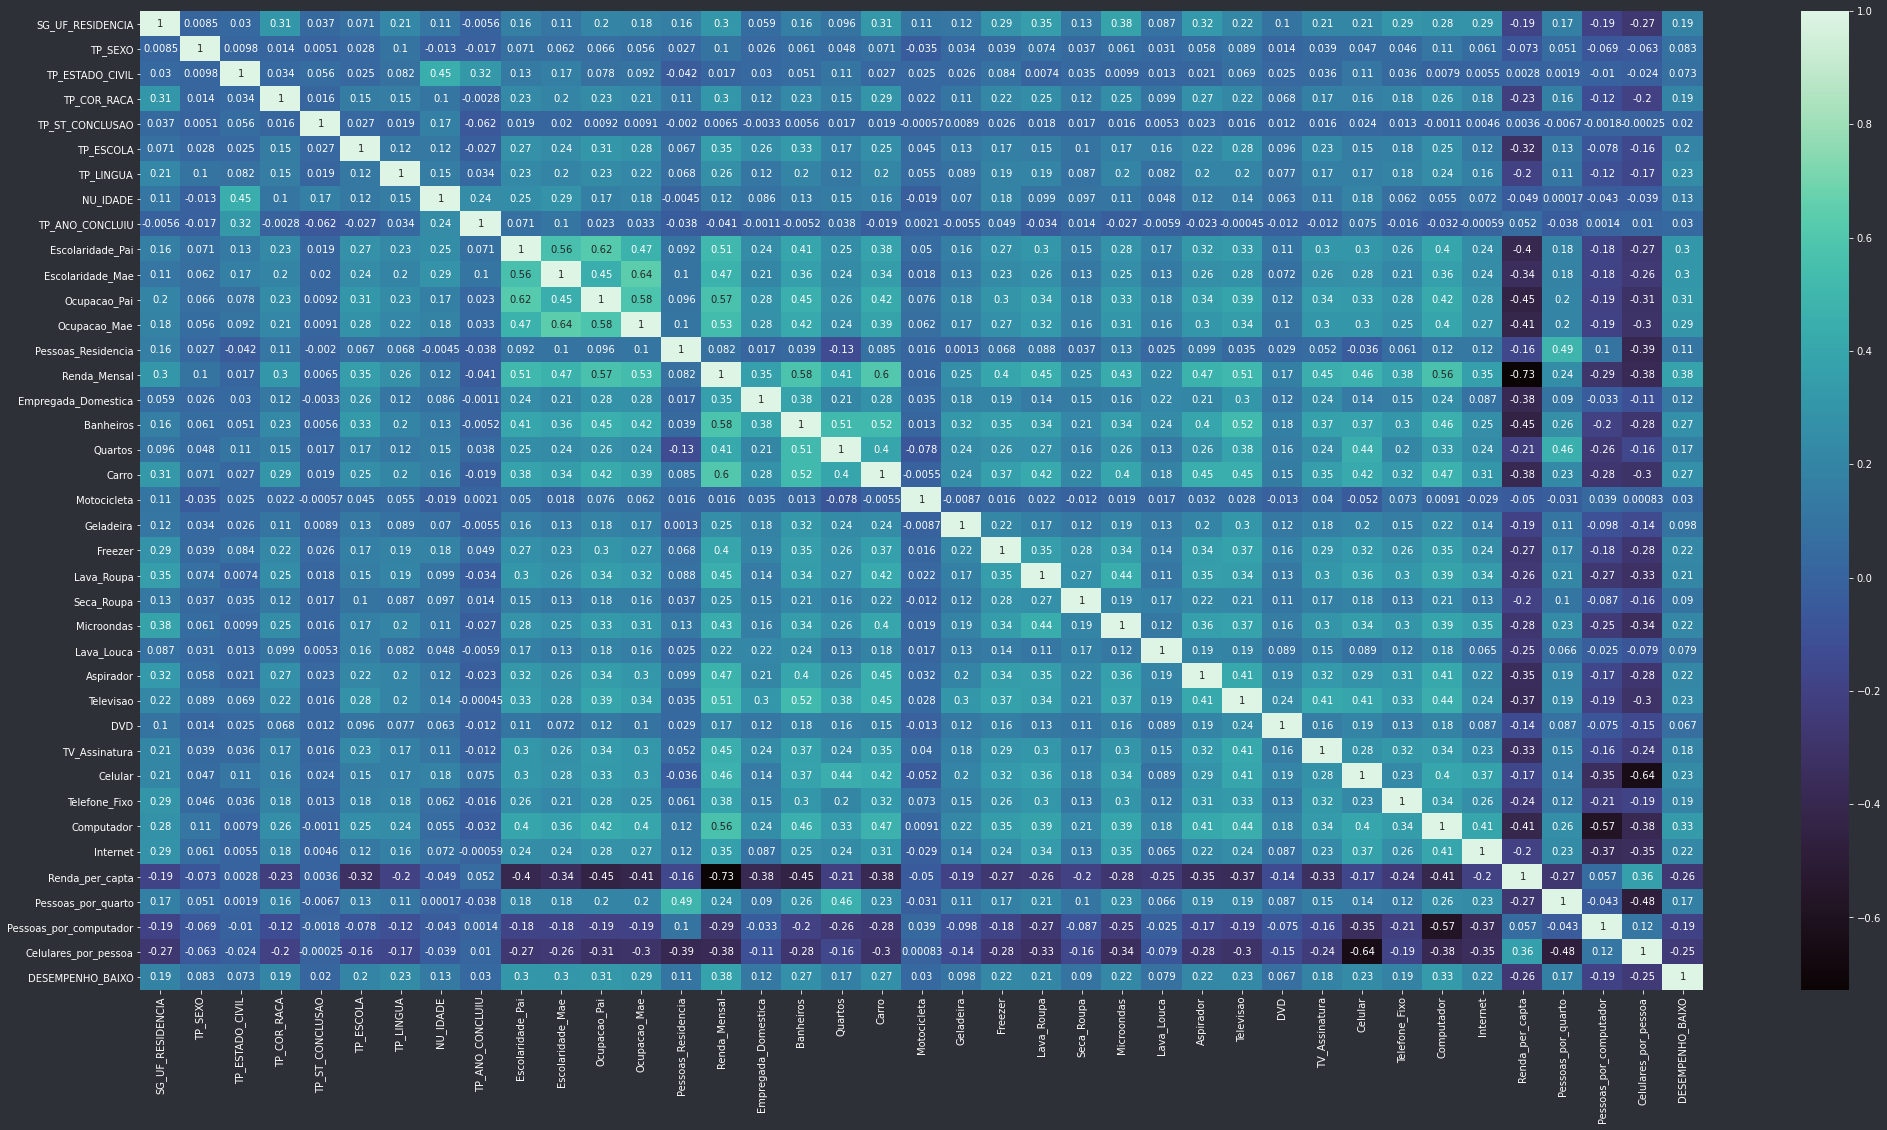

In [3]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(35, 18))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(35, 18), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.heatmap(data.corr(),annot=True,cmap="mako")
plt.savefig("../pictures/Matriz_correlação.png")

### Gini index

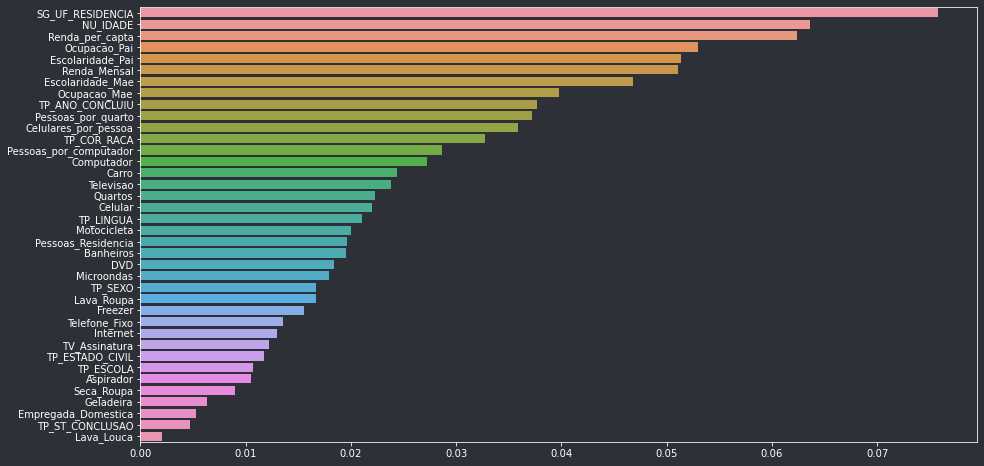

In [4]:
model = RandomForestClassifier(n_jobs = -1).fit(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"])
gini_importance = pd.Series(model.feature_importances_, index = data.drop("DESEMPENHO_BAIXO", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.barplot(x = gini_importance, y = gini_importance.index)
plt.savefig("../pictures/Gini.png")

### Permutation Importance

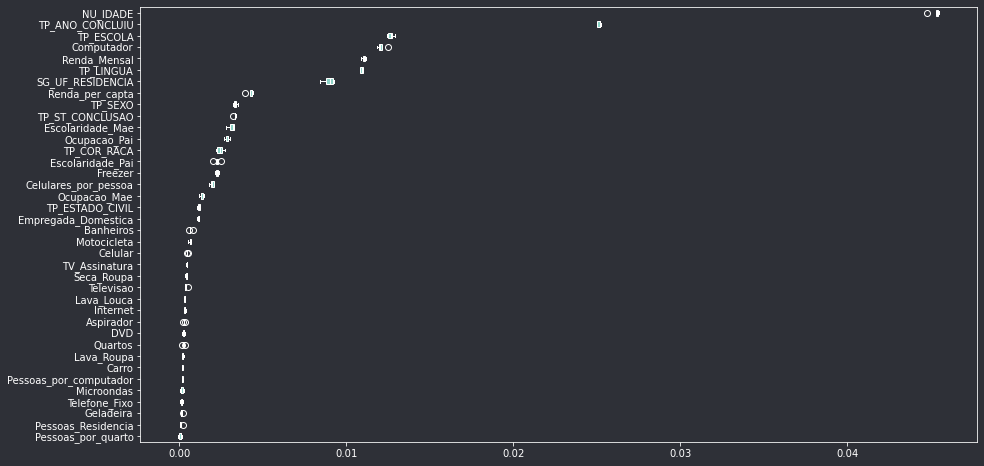

In [5]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
    
else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    c = "w"
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx], 
                patch_artist=True,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

permutation_importance = pd.Series(r.importances_mean[sorted_idx], index = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
plt.savefig("../pictures/Permutation_XGBoost.png")

## Recursive Feature Elimination

### Removing Least important features according to Gini

Recall when using complete dataset: 74.73%. Precision: 70.67%
Recall when removing 1 variables: 74.7%. Precision: 70.61%
Recall when removing 2 variables: 74.81%. Precision: 70.56%
Recall when removing 3 variables: 74.78%. Precision: 70.55%
Recall when removing 4 variables: 74.75%. Precision: 70.57%
Recall when removing 5 variables: 74.85%. Precision: 70.51%
Recall when removing 6 variables: 74.82%. Precision: 70.53%
Recall when removing 7 variables: 74.26%. Precision: 70.51%
Recall when removing 8 variables: 74.18%. Precision: 70.56%
Recall when removing 9 variables: 74.21%. Precision: 70.48%
Recall when removing 10 variables: 74.21%. Precision: 70.52%
Recall when removing 11 variables: 74.19%. Precision: 70.52%
Recall when removing 12 variables: 74.17%. Precision: 70.47%
Recall when removing 13 variables: 74.14%. Precision: 70.43%
Recall when removing 14 variables: 74.18%. Precision: 70.14%
Recall when removing 15 variables: 74.19%. Precision: 70.16%
Recall when removing 16 variables

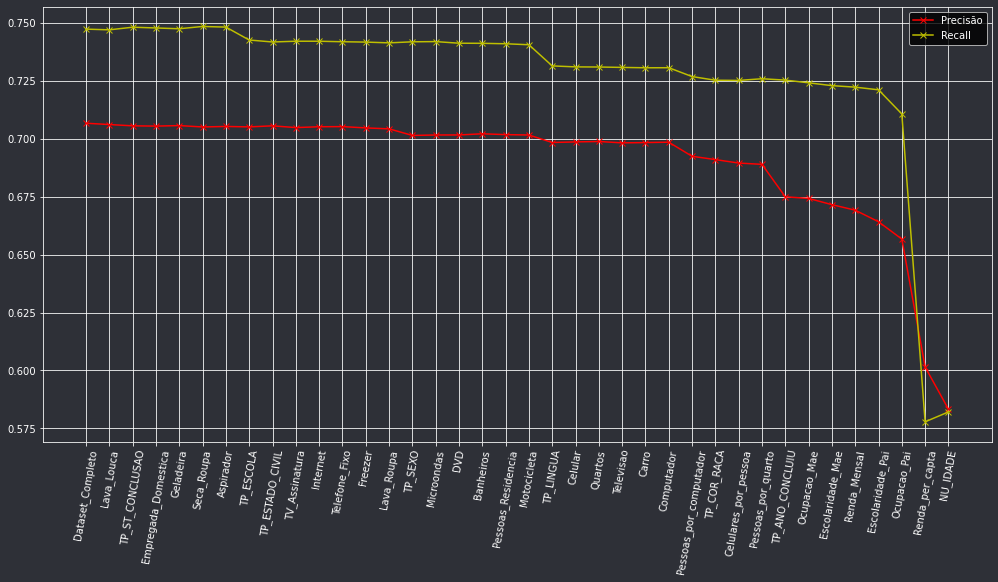

In [6]:
l_precision = []
l_recall = []
l_labels = []

gini_importance.sort_values(ascending = True, inplace = True)
train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

for i, remove_col in enumerate(gini_importance.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/Gini_recursivo.png")

### Removing Least important features according to Permutation Importance

Recall when using complete dataset: 74.73%.
Recall when removing 1 variables: 74.75%. Precision: 70.64%
Recall when removing 2 variables: 74.74%. Precision: 70.63%
Recall when removing 3 variables: 74.73%. Precision: 70.66%
Recall when removing 4 variables: 74.73%. Precision: 70.65%
Recall when removing 5 variables: 74.81%. Precision: 70.63%
Recall when removing 6 variables: 74.79%. Precision: 70.62%
Recall when removing 7 variables: 74.66%. Precision: 70.62%
Recall when removing 8 variables: 74.7%. Precision: 70.61%
Recall when removing 9 variables: 74.65%. Precision: 70.63%
Recall when removing 10 variables: 74.74%. Precision: 70.6%
Recall when removing 11 variables: 74.79%. Precision: 70.6%
Recall when removing 12 variables: 74.75%. Precision: 70.58%
Recall when removing 13 variables: 74.79%. Precision: 70.54%
Recall when removing 14 variables: 74.7%. Precision: 70.58%
Recall when removing 15 variables: 74.68%. Precision: 70.57%
Recall when removing 16 variables: 74.73%. Precision: 

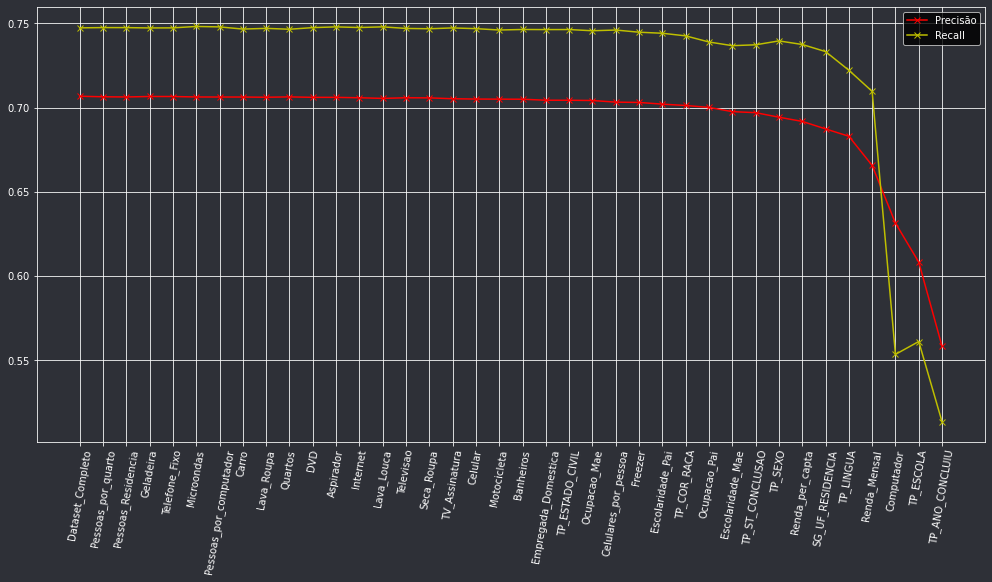

In [7]:
l_precision = []
l_recall = []
l_labels = []

train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%.")

for i, remove_col in enumerate(permutation_importance.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/Permutação_recursivo.png")

## Backward Feature Selection

#### Using Precision micro as reference

Recall using complete dataset: 74.73%. Precision: 70.67%.
Recall when removing Quartos: 74.77%. Precision: 70.65%.
Recall when removing Pessoas_por_computador: 74.62%. Precision: 70.65%.
Recall when removing Lava_Louca: 74.69%. Precision: 70.65%.
Recall when removing Ocupacao_Mae: 74.61%. Precision: 70.64%.
Recall when removing Microondas: 74.62%. Precision: 70.64%.
Recall when removing Telefone_Fixo: 74.6%. Precision: 70.64%.
Recall when removing Televisao: 74.55%. Precision: 70.65%.
Recall when removing Pessoas_por_quarto: 74.57%. Precision: 70.65%.
Recall when removing Geladeira: 74.6%. Precision: 70.63%.
Recall when removing Carro: 74.58%. Precision: 70.64%.
Recall when removing Pessoas_Residencia: 74.62%. Precision: 70.62%.
Recall when removing Aspirador: 74.62%. Precision: 70.63%.
Recall when removing Renda_per_capta: 74.63%. Precision: 70.62%.
Recall when removing TP_ESCOLA: 74.01%. Precision: 70.66%.
Recall when removing Seca_Roupa: 73.91%. Precision: 70.62%.
Recall when removi

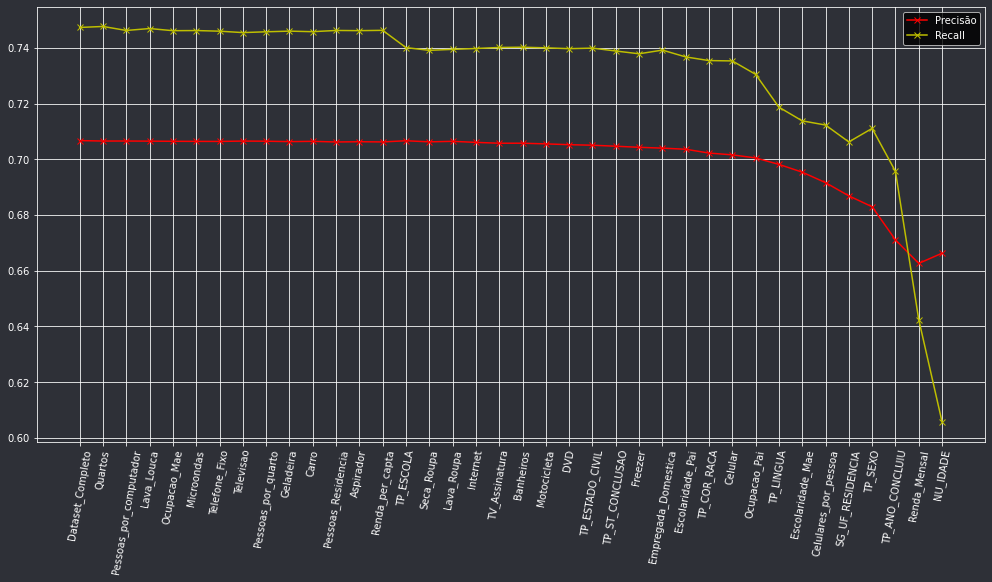

In [8]:
l_precision = []
l_recall = []
l_labels = []

train_temp = train[:]
test_temp = test[:]

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo") 

print("Recall using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%.")

while len(train_temp.columns) > 2:
    
    
    features = train_temp.drop("DESEMPENHO_BAIXO", 1).columns[:]
    list_of_precision = []
    list_of_recall = []
    list_of_precision_micro = []
    
    for feature in features:

        test_temp.drop(feature, 1, inplace = True)
        train_temp.drop(feature, 1, inplace = True)

        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop("DESEMPENHO_BAIXO", 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop("DESEMPENHO_BAIXO", 1))

        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        precision_micro = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "micro")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        
        list_of_precision.append(precision)
        list_of_precision_micro.append(precision)
        list_of_recall.append(recall)  
        
        train_temp[feature] = train[feature]
        test_temp[feature] = test[feature] 
    
    best_precision = 0

    for i, feature in enumerate(features):

        if list_of_precision_micro[i] > best_precision:
            best_precision = list_of_precision[i]
            best_recall = list_of_recall[i]
            best_feature = feature

    train_temp.drop(best_feature, 1, inplace = True)
    test_temp.drop(best_feature, 1, inplace = True)
    
    l_precision.append(best_precision)
    l_recall.append(best_recall)
    l_labels.append(best_feature) 
    
    print("Recall when removing " + best_feature + ": " + str(round(best_recall*100, 2)) + "%. Precision: " + str(round(best_precision*100, 2)) + "%.")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/BackwardSelection.png")

## Removing features

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1)

removed_features = ["Pessoas_Residencia", "Celular", "Quartos", "Geladeira", "Computador_por_pessoa", "Microondas", 
                    "Pessoas_por_quarto", "Aspirador", "Telefone_Fixo", "DVD", "Lava_Louca", "Carro", "Televisao", "Lava_Roupa",
                    "Internet", "Seca_Roupa", "TV_Assinatura", "Motocicleta", "Banheiros", "Empregada_Domestica", 
                    "TP_ESTADO_CIVIL", "Ocupacao_Mae", "Celulares_por_pessoa"] 

data.drop(removed_features, 1, inplace = True)
train, test = train_test_split(data, test_size=0.30)

## Permutation Importance of final features

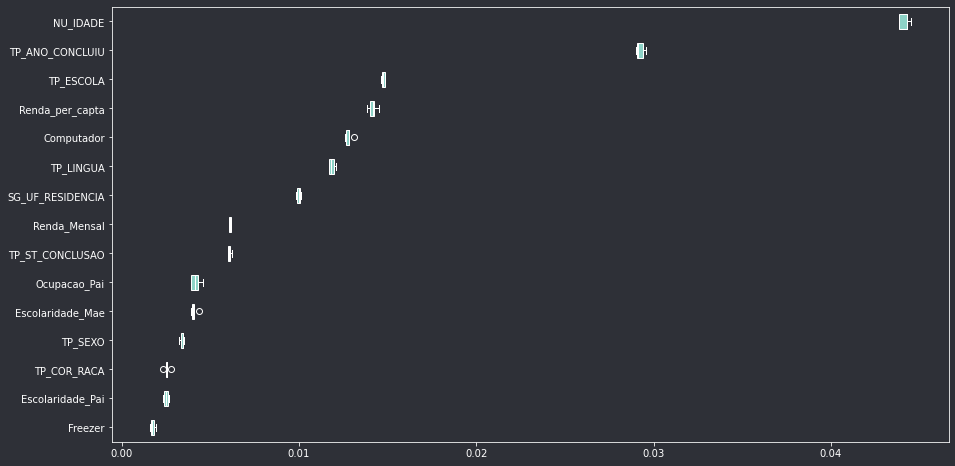

In [3]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
    
else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    c = "w"
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx], 
                patch_artist=True,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

## Saving data

In [4]:
data.to_csv("../dataset/dataset_3.csv", sep = ";")